# 1. Import Pakages:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter("ignore")

# 2. List of Files in the Directory 📃

In [8]:
files = [file for file in os.listdir('Sales Data')]

In [9]:
files

['Sales_April_2020.csv',
 'Sales_April_2021.csv',
 'Sales_August_2020.csv',
 'Sales_August_2021.csv',
 'Sales_December_2020.csv',
 'Sales_December_2021.csv',
 'Sales_February_2020.csv',
 'Sales_February_2021.csv',
 'Sales_January_2020.csv',
 'Sales_January_2021.csv',
 'Sales_July_2020.csv',
 'Sales_July_2021.csv',
 'Sales_June_2020.csv',
 'Sales_June_2021.csv',
 'Sales_March_2020.csv',
 'Sales_March_2021.csv',
 'Sales_May_2020.csv',
 'Sales_May_2021.csv',
 'Sales_November_2020.csv',
 'Sales_November_2021.csv',
 'Sales_October_2020.csv',
 'Sales_October_2021.csv',
 'Sales_September_2020.csv',
 'Sales_September_2021.csv']

## 2.1. Combine all 24 Months into a Single File.

In [10]:
# Create an empty DataFrame to store the combined data
df_final = pd.DataFrame()

In [11]:
# Loop through each file and read data into the combined DataFrame
for file in files:
    df = pd.read_csv('Sales Data/'+file)
    df_final = pd.concat([df_final,df])

In [12]:
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,171654,USB-C Charging Cable,1,11.95,04/22/20 22:27,"784 Pine St, Los Angeles, CA 90001"
1,171655,Wired Headphones,2,11.99,04/02/20 15:14,"513 North St, Boston, MA 02215"
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20 20:09,"480 Maple St, Los Angeles, CA 90001"
3,171657,Wired Headphones,1,11.99,04/05/20 00:23,"5 Pine St, San Francisco, CA 94016"
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20 10:36,"95 Lake St, New York City, NY 10001"
...,...,...,...,...,...,...
17116,250343,Wired Headphones,1,11.99,09/13/21 21:20,"981 West St, San Francisco, CA 94016"
17117,250344,Bose SoundSport Headphones,1,99.99,09/15/21 15:41,"16 Highland St, Los Angeles, CA 90001"
17118,250345,AAA Batteries (4-pack),3,2.99,09/15/21 17:13,"630 South St, Los Angeles, CA 90001"
17119,250346,Wired Headphones,1,11.99,09/25/21 08:15,"626 Adams St, San Francisco, CA 94016"


## 2.2. Drop Repeated Headers

Due to Combine the Data Set of 24 Months the Headers got Repeated.

In [13]:
df_final[df_final['Order ID'] == 'Order ID'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
21,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
362,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
692,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
903,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1894,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### 2.3. Select All Rows Except Rows containing Header Names.

In [14]:
df_final = df_final[df_final['Order ID'] != 'Order ID']

In [15]:
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,171654,USB-C Charging Cable,1,11.95,04/22/20 22:27,"784 Pine St, Los Angeles, CA 90001"
1,171655,Wired Headphones,2,11.99,04/02/20 15:14,"513 North St, Boston, MA 02215"
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20 20:09,"480 Maple St, Los Angeles, CA 90001"
3,171657,Wired Headphones,1,11.99,04/05/20 00:23,"5 Pine St, San Francisco, CA 94016"
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20 10:36,"95 Lake St, New York City, NY 10001"
...,...,...,...,...,...,...
17116,250343,Wired Headphones,1,11.99,09/13/21 21:20,"981 West St, San Francisco, CA 94016"
17117,250344,Bose SoundSport Headphones,1,99.99,09/15/21 15:41,"16 Highland St, Los Angeles, CA 90001"
17118,250345,AAA Batteries (4-pack),3,2.99,09/15/21 17:13,"630 South St, Los Angeles, CA 90001"
17119,250346,Wired Headphones,1,11.99,09/25/21 08:15,"626 Adams St, San Francisco, CA 94016"


# 3. Cleaning and preprocessing

## 3.1.Check Missing Values

In [16]:
df_final.isnull().sum()

Order ID            1078
Product             1078
Quantity Ordered    1078
Price Each          1078
Order Date          1078
Purchase Address    1078
dtype: int64

In [17]:
df_final[df_final.isna().any(axis=1)].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN
832,NaN,NaN,NaN,NaN,NaN,NaN
1267,NaN,NaN,NaN,NaN,NaN,NaN
1298,NaN,NaN,NaN,NaN,NaN,NaN


## Note:
#### - Based on observation, the dataset includes missing values, and it seems that entire rows consist of NaN.
#### - Directly Drop those Rows.

In [18]:
df_final = df_final.dropna()

In [19]:
df_final.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## 3.2.Check duplicates

In [20]:
df_final.duplicated().sum()

480

In [21]:
duplicates = df_final[df_final.duplicated(keep=False)]

# print the rows with identical values
print(duplicates)

      Order ID                   Product Quantity Ordered Price Each  \
240     171884     AA Batteries (4-pack)                1       3.84   
241     171884     AA Batteries (4-pack)                1       3.84   
524     172156  Lightning Charging Cable                1      14.95   
525     172156  Lightning Charging Cable                1      14.95   
820     172439     AA Batteries (4-pack)                2       3.84   
...        ...                       ...              ...        ...   
13356   246744          Wired Headphones                1      11.99   
13453   246836  Lightning Charging Cable                1      14.95   
13454   246836  Lightning Charging Cable                1      14.95   
15820   249100    AAA Batteries (4-pack)                1       2.99   
15821   249100    AAA Batteries (4-pack)                1       2.99   

           Order Date                        Purchase Address  
240    04/09/20 12:22        921 Church St, Seattle, WA 98101  
241    

**Note:**
- I decided that these values are **duplicates** because they contain the same invoice number and the same date and time. There is also a column dedicated to quantities, so if the product is selected more than once, it will appear in the quantities field.
- Drop all dublicates values.

In [22]:
df_final.drop_duplicates(keep=False, inplace=True)

In [23]:
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,171654,USB-C Charging Cable,1,11.95,04/22/20 22:27,"784 Pine St, Los Angeles, CA 90001"
1,171655,Wired Headphones,2,11.99,04/02/20 15:14,"513 North St, Boston, MA 02215"
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20 20:09,"480 Maple St, Los Angeles, CA 90001"
3,171657,Wired Headphones,1,11.99,04/05/20 00:23,"5 Pine St, San Francisco, CA 94016"
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20 10:36,"95 Lake St, New York City, NY 10001"
...,...,...,...,...,...,...
17116,250343,Wired Headphones,1,11.99,09/13/21 21:20,"981 West St, San Francisco, CA 94016"
17117,250344,Bose SoundSport Headphones,1,99.99,09/15/21 15:41,"16 Highland St, Los Angeles, CA 90001"
17118,250345,AAA Batteries (4-pack),3,2.99,09/15/21 17:13,"630 South St, Los Angeles, CA 90001"
17119,250346,Wired Headphones,1,11.99,09/25/21 08:15,"626 Adams St, San Francisco, CA 94016"


## 3.3. Change the type of columns

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366250 entries, 0 to 17120
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          366250 non-null  object
 1   Product           366250 non-null  object
 2   Quantity Ordered  366250 non-null  object
 3   Price Each        366250 non-null  object
 4   Order Date        366250 non-null  object
 5   Purchase Address  366250 non-null  object
dtypes: object(6)
memory usage: 19.6+ MB


### 3.3.1.Convert data type Quantity Ordered and Price Each to numeric.

In [25]:
df_final['Quantity Ordered'] = pd.to_numeric(df_final['Quantity Ordered'])
df_final['Price Each'] = pd.to_numeric(df_final['Price Each'])

# 

### 3.3.2.Convert data type Order Date to Datatime.

In [26]:
df_final['Order Date'] = pd.to_datetime(df_final['Order Date'])

In [27]:
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,171654,USB-C Charging Cable,1,11.95,2020-04-22 22:27:00,"784 Pine St, Los Angeles, CA 90001"
1,171655,Wired Headphones,2,11.99,2020-04-02 15:14:00,"513 North St, Boston, MA 02215"
2,171656,Bose SoundSport Headphones,1,99.99,2020-04-30 20:09:00,"480 Maple St, Los Angeles, CA 90001"
3,171657,Wired Headphones,1,11.99,2020-04-05 00:23:00,"5 Pine St, San Francisco, CA 94016"
4,171658,AAA Batteries (4-pack),2,2.99,2020-04-07 10:36:00,"95 Lake St, New York City, NY 10001"
...,...,...,...,...,...,...
17116,250343,Wired Headphones,1,11.99,2021-09-13 21:20:00,"981 West St, San Francisco, CA 94016"
17117,250344,Bose SoundSport Headphones,1,99.99,2021-09-15 15:41:00,"16 Highland St, Los Angeles, CA 90001"
17118,250345,AAA Batteries (4-pack),3,2.99,2021-09-15 17:13:00,"630 South St, Los Angeles, CA 90001"
17119,250346,Wired Headphones,1,11.99,2021-09-25 08:15:00,"626 Adams St, San Francisco, CA 94016"


# 4. Feature Engineering: 

**Add new column Sales.**

In [28]:
df_final['Sales'] = df_final['Quantity Ordered'] * df_final['Price Each']

**Add new Columns Month, Year, Hour and Minute.**

In [29]:
df_final['Month'] = df_final['Order Date'].dt.month
df_final['Year'] = df_final['Order Date'].dt.year
df_final['Hour'] = df_final['Order Date'].dt.hour
df_final['Minute'] = df_final['Order Date'].dt.minute

**Extract the city and state information from the Purchase Address column.**

In [30]:
#Splits the address at commas and selects the second part, Removes leading and trailing whitespaces.
def get_city(address):
    return address.split(",")[1].strip(" ")

#Splits the address at commas and selects the third part and splits the third part by spaces and selects the second part
def get_state(address):
    return address.split(",")[2].split(" ")[1]

In [31]:
df_final['City'] = df_final['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

In [32]:
print(df_final.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales', 'Month', 'Year', 'Hour', 'Minute', 'City'],
      dtype='object')


# 5.  Exploratory data analysis


<span style="color:red;">**Question 1: What was the best month for sales in 2020? How much was earned that month?**.</span>

In [33]:
# Filter data for the year 2021
sales_2020 = df_final[df_final['Year'] == 2020] 
sales_2020_grouped = sales_2020.groupby('Month')[['Quantity Ordered','Sales']].sum().sort_values('Sales')
sales_2020_grouped

,Quantity Ordered,Sales
Month,,
3,6837,1134228.86
8,7758,1351743.95
2,8519,1477797.68
4,14868,2450146.62
6,16513,2671518.51
7,17189,2865839.69
5,17700,2965580.92
1,20215,3310915.85
9,26362,4341266.02


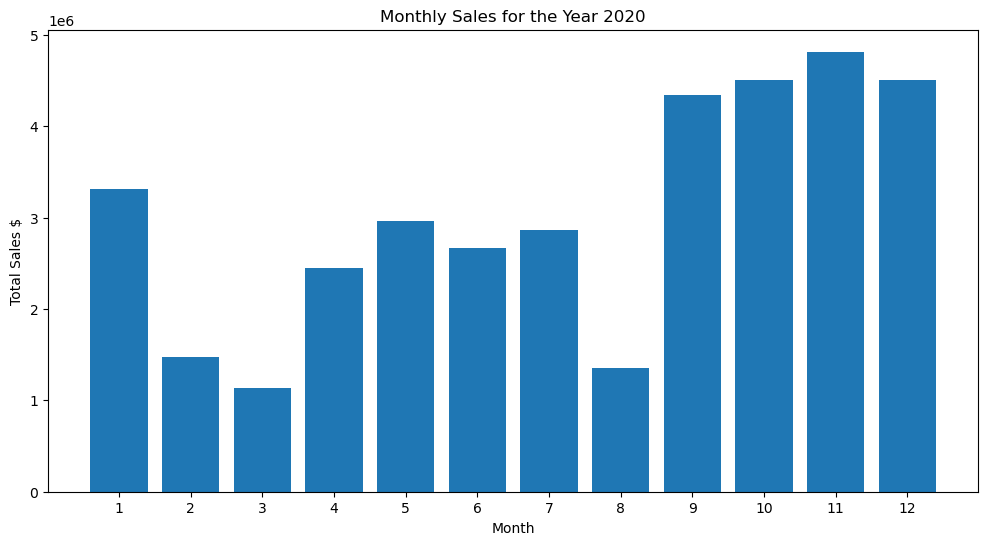

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(sales_2020_grouped.index, sales_2020_grouped['Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales $')
plt.title('Monthly Sales for the Year 2020')
plt.xticks(sales_2020_grouped.index) 
plt.show()

**Note:**

<span style="color:green;">**End of the year experiences a surge in sales attributed to several factors:**</span>

- One notable contributor is stock clearance sales, where many individuals await opportune moments to make purchases at reduced prices during clearance events.
- Additionally, the allure of New Year sales and associated offers further stimulates consumer activity during this period.
- Furthermore, the festive spirit is enhanced by Christmas sales and associated promotions, creating an environment conducive to increased sales.

**SQL Query for best month for sales in 2020.**

<span style="color:red;">****Question 2:Which City has the Highest Sales in 2021?**.</span>

In [35]:
# Filter data for the year 2021
sales_2021 = df_final[df_final['Year'] == 2021]

# Group by 'City' and calculate total sales for each city
city_sales_2021 = sales_2021.groupby('City')['Sales'].sum()

city_sales_2021


City
Atlanta  (GA)          2542703.73
Austin  (TX)           1700282.76
Boston  (MA)           3358863.84
Dallas  (TX)           2581592.33
Los Angeles  (CA)      5086020.72
New York City  (NY)    4284611.78
Portland  (ME)          464319.54
Portland  (OR)         1705084.81
San Francisco  (CA)    7699195.80
Seattle  (WA)          2598796.08
Name: Sales, dtype: float64

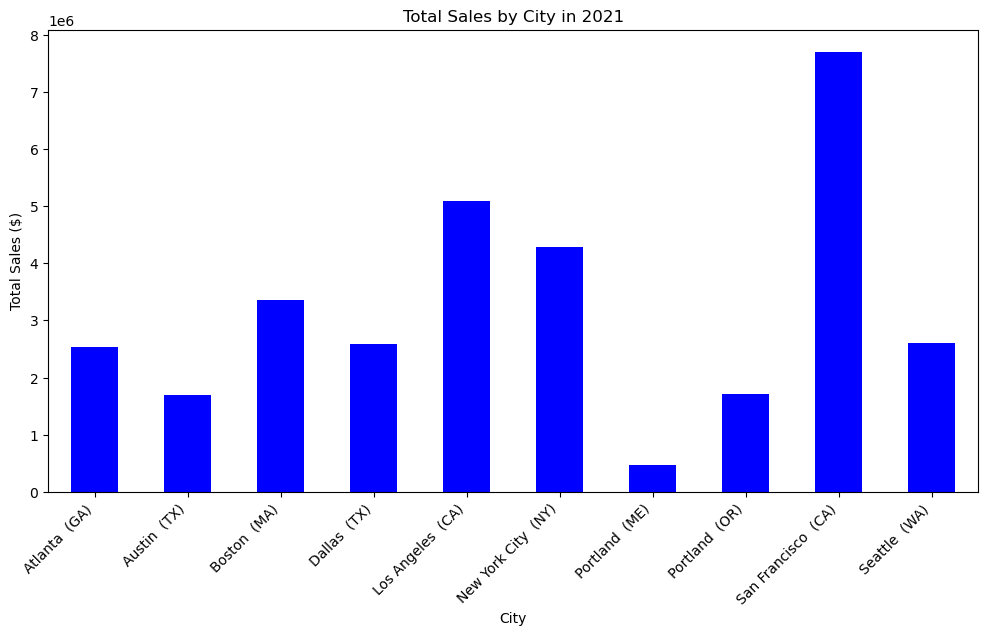

In [36]:
plt.figure(figsize=(12, 6))
city_sales_2021.plot(kind='bar', color='blue')
plt.title('Total Sales by City in 2021')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

**SQL Query for best city for sales in 2021.**


<span style="color:red;">**Question 3:What Time Should we Display Advertisements to Maximize Likelihood of Customer's Buying Product ?**.</span>

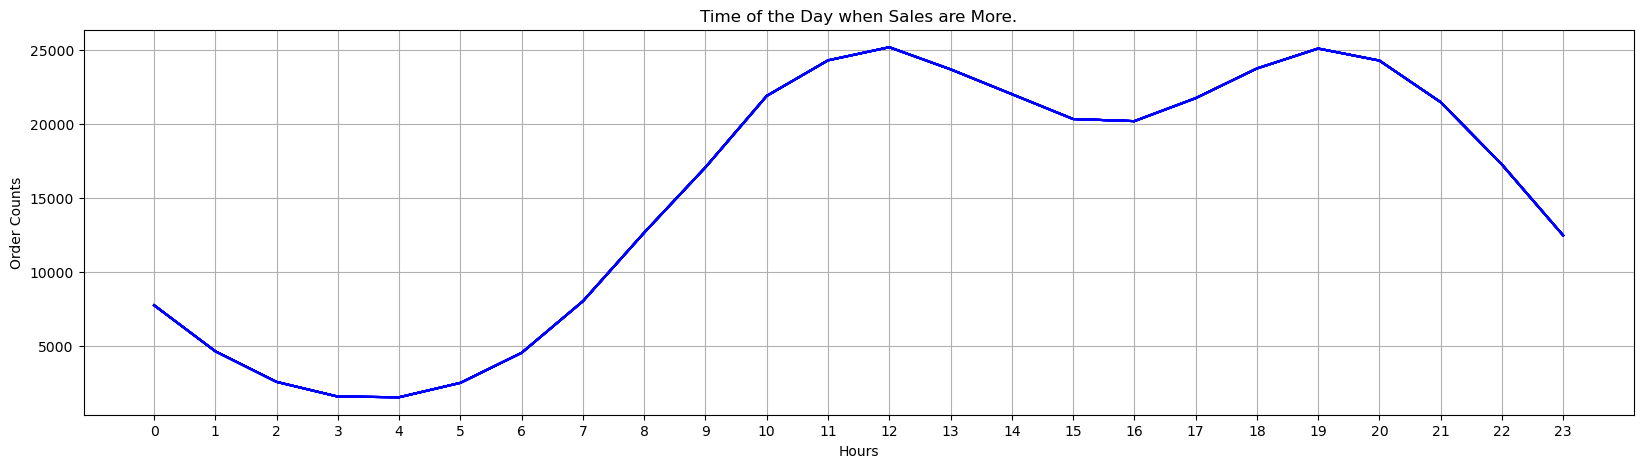

In [37]:
hour = [hr for hr, df_final in df_final.groupby('Hour')]

plt.figure(figsize = (20,5))
plt.plot(hour, df_final.groupby(['Hour']).count(), color = 'b')
plt.xticks(hour)
plt.grid()
plt.title('Time of the Day when Sales are More.')
plt.xlabel('Hours')
plt.ylabel('Order Counts');

**Note:**

<span style="color:green;">**Customers Visits Store or Order more between 10a.m. to 1p.m. and 6p.m. to 9.00p.m.**</span>



<span style="color:red;">**Question 4:Which Product was Sold Most Frequently?**.</span>


In [38]:
product_group = df_final.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

sorted_products = quantity_ordered.sort_values(ascending=False)

print("Products sorted by total quantity ordered:")
print(sorted_products)


Products sorted by total quantity ordered:
Product
AAA Batteries (4-pack)        61500
AA Batteries (4-pack)         55186
USB-C Charging Cable          47098
Lightning Charging Cable      45455
Wired Headphones              40369
Apple Airpods Headphones      30693
Bose SoundSport Headphones    26460
27in FHD Monitor              14934
iPhone                        13742
34in Ultrawide Monitor        12179
27in 4K Gaming Monitor        12041
Google Phone                  10903
Macbook Pro Laptop             9518
Flatscreen TV                  9511
ThinkPad Laptop                8153
20in Monitor                   8133
Vareebadd Phone                4122
LG Washing Machine             1331
LG Dryer                       1331
Name: Quantity Ordered, dtype: int64


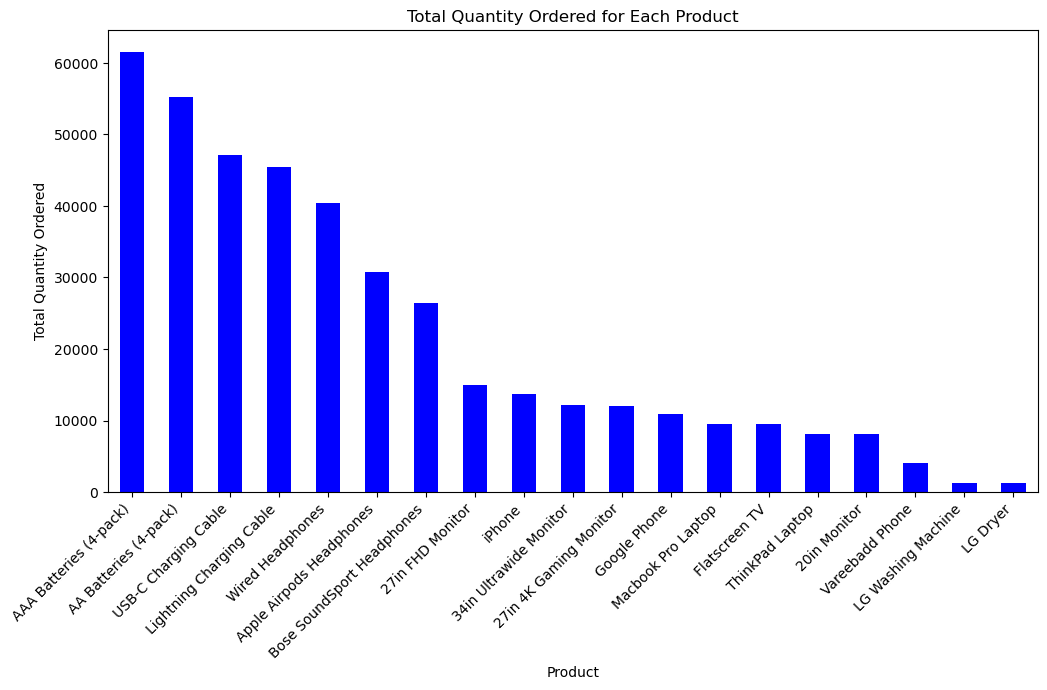

In [39]:
plt.figure(figsize=(12, 6))
sorted_products.plot(kind='bar', color='blue')
plt.title('Total Quantity Ordered for Each Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.show()

**Note:**


<span style="color:green;">- **AA and AAA batteries** are top-selling items, likely due to their widespread use in remote controls, clocks, toys, and various electronic devices.</span>

<span style="color:green;">- **Charging cables and headphones** are also essential products for daily use, contributing to their significance in sales.</span>

<span style="color:green;">- It's noteworthy that **pricing plays a crucial role in purchasing decisions**. Higher-priced products may not see as frequent purchases, as customers tend to prioritize more affordable options for regular use.</span>



# The End 👨🏻‍💻